# Bananenflanke

Als Bananenflanke bezeichnet man im Sprachgebrauch des Fußballs eine Flanke vor das gegnerische Tor mit stark gekrümmter Flugbahn. Dafür wird der Ball aus dem Spiel heraus mit Effet getreten, so dass seine Flugkurve der Krümmung einer Banane ähnelt.

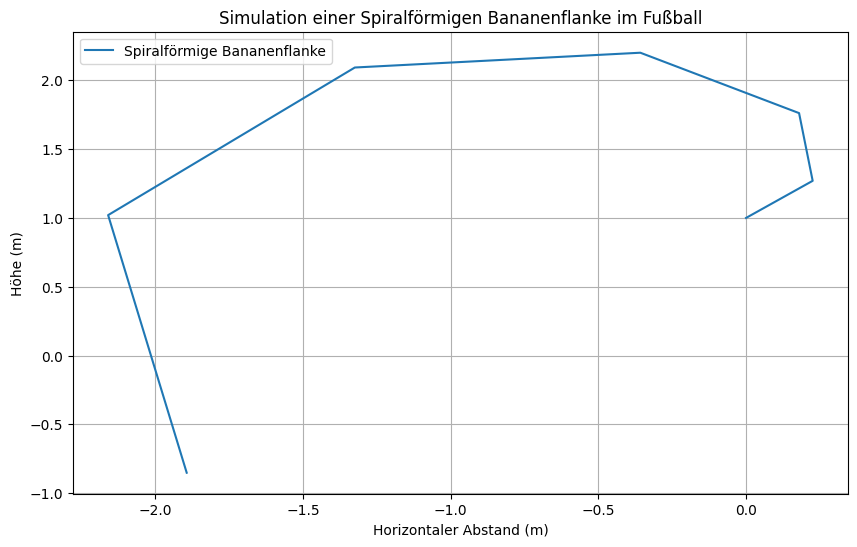

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
g = 9.81  # Erdbeschleunigung in m/s^2
m = 0.43  # Masse des Balls in kg (typische Fußballmasse)
r = 0.11  # Radius des Balls in Metern (etwa 11 cm)
Cd = 0.47  # Luftwiderstandsbeiwert (für einen runden Ball)
rho = 1.225  # Dichte der Luft in kg/m^3
v0 = 25  # Anfangsgeschwindigkeit in m/s
alpha = 5 * np.pi / 180  # Abwurfwinkel in Bogenmaß (z.B. 5°)
omega = 100  # Hohe Rotationsgeschwindigkeit des Balls in rad/s (sehr stark)
time_step = 0.01  # Zeitschritt in Sekunden
duration = 3  # Simulationsdauer in Sekunden

# Anfangsbedingungen
x0, y0 = 0, 1  # Startposition des Balls
vx0 = v0 * np.cos(alpha)  # Anfangsgeschwindigkeit in x-Richtung
vy0 = v0 * np.sin(alpha)  # Anfangsgeschwindigkeit in y-Richtung

# Berechnung des Luftwiderstands
def drag_force(vx, vy):
    v = np.sqrt(vx**2 + vy**2)
    Fd = 0.5 * Cd * rho * np.pi * r**2 * v**2  # Luftwiderstandskraft
    return Fd

# Berechnung des Magnus-Effekts
def magnus_force(vx, vy, omega):
    v = np.sqrt(vx**2 + vy**2)
    # Magnus-Kraft, basierend auf der Rotation des Balls
    Fm = (2 * np.pi * r**2 * omega * v * m) / (2 * np.pi * r**2)
    return np.array([-Fm * vy / v, Fm * vx / v])

# Simulation der Bewegung des Balls
def simulate():
    x, y = x0, y0
    vx, vy = vx0, vy0
    trajectory_x = [x]
    trajectory_y = [y]
    t = 0
    
    while y >= 0 and t <= duration:  # Solange der Ball den Boden nicht erreicht hat
        Fd = drag_force(vx, vy)
        fm = magnus_force(vx, vy, omega)

        # Beschleunigung durch Schwerkraft, Luftwiderstand und Magnus-Effekt
        ax = -Fd * vx / (m * np.sqrt(vx**2 + vy**2)) + fm[0] / m
        ay = -g - Fd * vy / (m * np.sqrt(vx**2 + vy**2)) + fm[1] / m
        
        # Bewegungsgleichungen (Beschleunigung = Änderung der Geschwindigkeit)
        vx += ax * time_step
        vy += ay * time_step
        
        # Position des Balls aktualisieren
        x += vx * time_step
        y += vy * time_step
        
        trajectory_x.append(x)
        trajectory_y.append(y)
        
        t += time_step
    
    return trajectory_x, trajectory_y

# Simulation starten
x_trajectory, y_trajectory = simulate()

# Plot der Trajektorie
plt.figure(figsize=(10, 6))
plt.plot(x_trajectory, y_trajectory, label="Spiralförmige Bananenflanke")
plt.title("Simulation einer Spiralförmigen Bananenflanke im Fußball")
plt.xlabel("Horizontaler Abstand (m)")
plt.ylabel("Höhe (m)")
plt.grid(True)
plt.legend()
plt.show()


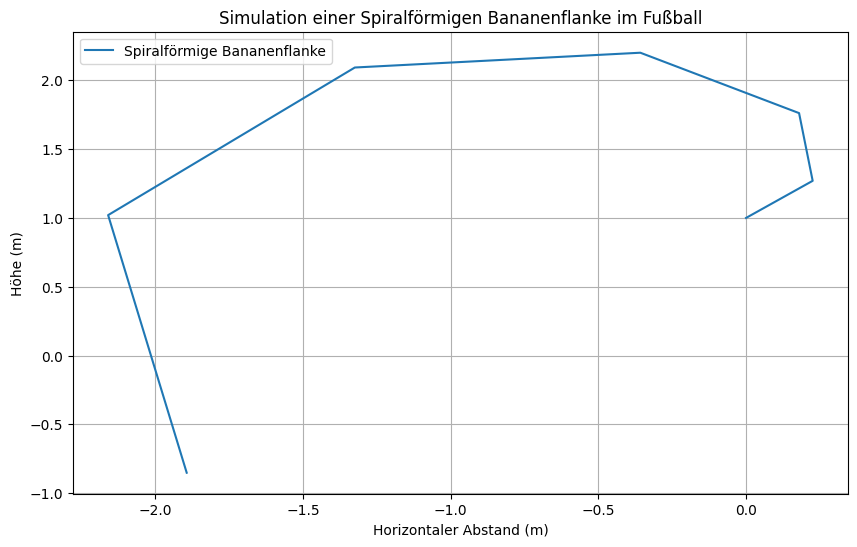

In [2]:
# Bananenflanke: Eine spezielle Art von Schuss im Fußball, 
# bei dem der Ball durch eine Kombination aus hoher Rotation 
# und einem bestimmten Abwurfwinkel eine gekrümmte Flugbahn beschreibt. 
# Dies wird oft verwendet, um den Ball um eine Mauer von Verteidigern zu schießen oder den Torwart zu täuschen.

import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_banana_kick_trajectory(v0, alpha, omega, duration, time_step):
    g = 9.81  # Erdbeschleunigung in m/s^2
    m = 0.43  # Masse des Balls in kg
    r = 0.11  # Radius des Balls in Metern
    Cd = 0.47  # Luftwiderstandsbeiwert
    rho = 1.225  # Dichte der Luft in kg/m^3

    x0, y0 = 0, 1  # Startposition des Balls
    vx0 = v0 * np.cos(alpha)  # Anfangsgeschwindigkeit in x-Richtung
    vy0 = v0 * np.sin(alpha)  # Anfangsgeschwindigkeit in y-Richtung

    def drag_force(vx, vy):
        v = np.sqrt(vx**2 + vy**2)
        Fd = 0.5 * Cd * rho * np.pi * r**2 * v**2
        return Fd

    def magnus_force(vx, vy, omega):
        v = np.sqrt(vx**2 + vy**2)
        Fm = (2 * np.pi * r**2 * omega * v * m) / (2 * np.pi * r**2)
        return np.array([-Fm * vy / v, Fm * vx / v])

    x, y = x0, y0
    vx, vy = vx0, vy0
    trajectory_x = [x]
    trajectory_y = [y]
    t = 0

    while y >= 0 and t <= duration:
        Fd = drag_force(vx, vy)
        fm = magnus_force(vx, vy, omega)

        ax = -Fd * vx / (m * np.sqrt(vx**2 + vy**2)) + fm[0] / m
        ay = -g - Fd * vy / (m * np.sqrt(vx**2 + vy**2)) + fm[1] / m

        vx += ax * time_step
        vy += ay * time_step

        x += vx * time_step
        y += vy * time_step

        trajectory_x.append(x)
        trajectory_y.append(y)

        t += time_step

    return trajectory_x, trajectory_y

# Parameter für die Simulation
v0 = 25  # Anfangsgeschwindigkeit in m/s
alpha = 5 * np.pi / 180  # Abwurfwinkel in Bogen
omega = 100  # Rotationsgeschwindigkeit in rad/s
duration = 3  # Simulationsdauer in Sekunden
time_step = 0.01  # Zeitschritt in Sekunden
x_trajectory, y_trajectory = calculate_banana_kick_trajectory(v0, alpha, omega, duration, time_step)
plt.figure(figsize=(10, 6))
plt.plot(x_trajectory, y_trajectory, label="Spiralförmige Bananenflanke")
plt.title("Simulation einer Spiralförmigen Bananenflanke im Fußball")
plt.xlabel("Horizontaler Abstand (m)")
plt.ylabel("Höhe (m)")
plt.grid(True)
plt.legend()
plt.show()



$Druck = konst. - \frac{1}{2} \cdot Dichte \cdot Geschwindigkeit^2$

# Schieferwurf angepasst für Freistoß

Nehmen an dass der ball wie eine glatte kugel ist

Ähnlich wie der schiefe wurf

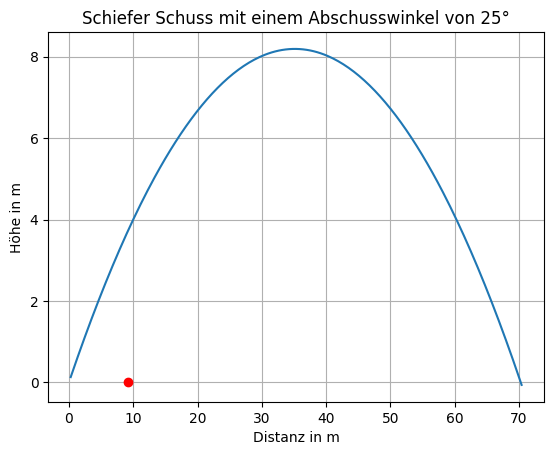

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

g=9.81  #m/s^2
v0=30   #m/s
t=0
dt=0.01


winkel = 25  # Abschusswinkel in Grad
vx = v0 * math.cos(math.radians(winkel))
vy = v0 * math.sin(math.radians(winkel))


Lx = []
Ly = []

for i in range (0, 500):
    t = t + dt
    x = vx * t
    y = vy * t - 1/2 * g * t**2
    Lx.append(x)
    Ly.append(y)
    if y < 0:
        break

plt.plot(Lx, Ly)
plt.plot(9.15,0,marker="o", color="red", label="Spielermauer")
plt.title("Schiefer Schuss mit einem Abschusswinkel von 25°")
plt.xlabel("Distanz in m")
plt.ylabel("Höhe in m")
plt.grid()
plt.show()


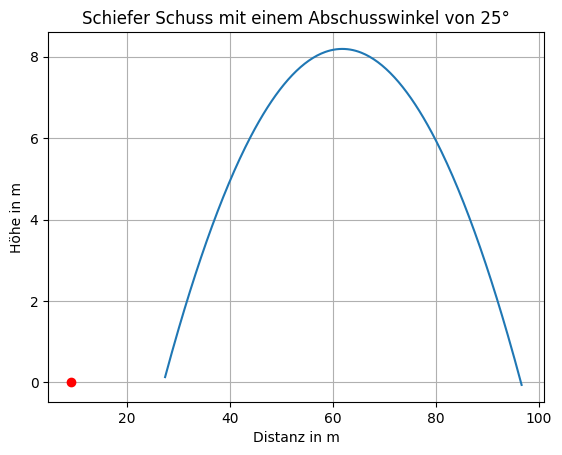

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

g=9.81  #m/s^2
v0=30   #m/s
t=0
dt=0.01
dichte= 1.2  # kg/m^3, Dichte der Luft
Cd = 0.47  # Luftwiderstandsbeiwert für einen runden Ball

A = np.pi * r**2  # Querschnittsfläche des Balls

m = 0.43  # Masse des Balls in kg
r = 0.11  # Radius des Balls in m
spin = 40 # Rotationsgeschwindigkeit in rad/s

winkel = 25  # Abschusswinkel in Grad
v = np.array([v0 * math.cos(math.radians(winkel)), v0 * math.sin(math.radians(winkel))])

pos = np.array([0.0, 0.0])  # Startposition des Balls
positionen = []

Lx = []
Ly = []


for i in range (0, 500):
    t = t + dt
    x = vx + Fx/m * t # Hier müsste Fx definiert werden, z.B. durch den Magnus-Effekt
    y = vy * t - 1/2 * g * t**2
    Lx.append(x)
    Ly.append(y)
    if y < 0:
        break

plt.plot(Lx, Ly)
plt.plot(9.15,0,marker="o", color="red", label="Spielermauer")
plt.title("Schiefer Schuss mit einem Abschusswinkel von 25°")
plt.xlabel("Distanz in m")
plt.ylabel("Höhe in m")
plt.grid()
plt.show()


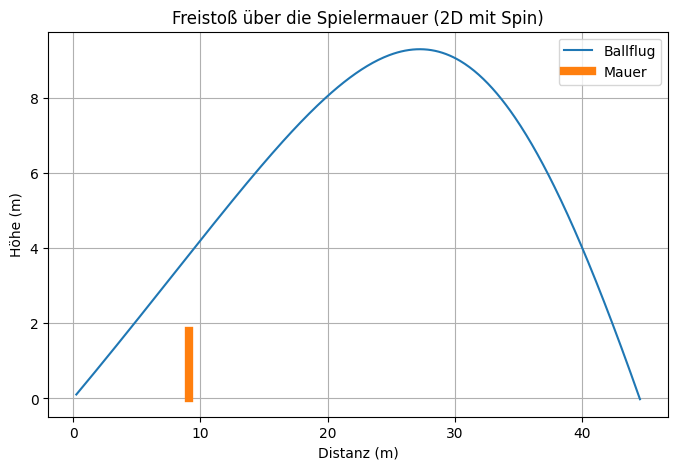

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Physikalische Konstanten
# -----------------------------
g = 9.81
rho = 1.2
Cd = 0.47
Cl = 0.2                 # Magnus-Koeffizient (nicht perfekt glatt)
r = 0.11
A = np.pi * r**2
m = 0.43

# -----------------------------
# Freistoß-Parameter
# -----------------------------
v0 = 28                  # Schussgeschwindigkeit (m/s)
winkel = 22               # Abschusswinkel (Grad)
spin = 40                # Rotation um z-Achse (rad/s)

winkel_rad = np.radians(winkel)

v = np.array([
    v0 * np.cos(winkel_rad),
    v0 * np.sin(winkel_rad)
])

pos = np.array([0.0, 0.0])
dt = 0.01
positionen = []

# -----------------------------
# Simulation
# -----------------------------
while pos[1] >= 0:
    gesamtgeschwindigkeit = np.linalg.norm(v)
    
    # Luftwiderstand
    F_drag = -0.5 * rho * Cd * A * gesamtgeschwindigkeit * v
    
    # Magnus-Kraft (2D Version)
    # Kreuzprodukt reduziert auf:
    # F_magnus = Cl * (spin × v)
    F_magnus = 0.5 * rho * Cl * A * np.array([
        -spin * v[1],
         spin * v[0]
    ])
    
    F_gravity = np.array([0, -m*g])
    
    F_total = F_drag + F_magnus + F_gravity
    a = F_total / m
    
    v = v + a * dt
    pos = pos + v * dt
    
    positionen.append(pos.copy())

positionen = np.array(positionen)

# -----------------------------
# Spielermauer
# -----------------------------
mauer_entfernung = 9.15     # Abstand (m)
mauer_hoehe = 1.8           # Höhe (m)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(positionen[:,0], positionen[:,1], label="Ballflug")

# Mauer einzeichnen
plt.plot([mauer_entfernung, mauer_entfernung],
         [0, mauer_hoehe],
         linewidth=6, label="Mauer")

plt.xlabel("Distanz (m)")
plt.ylabel("Höhe (m)")
plt.title("Freistoß über die Spielermauer (2D mit Spin)")
plt.legend()
plt.grid()
plt.show()

Ball kommt über die Mauer.
TOR!!! ⚽🔥


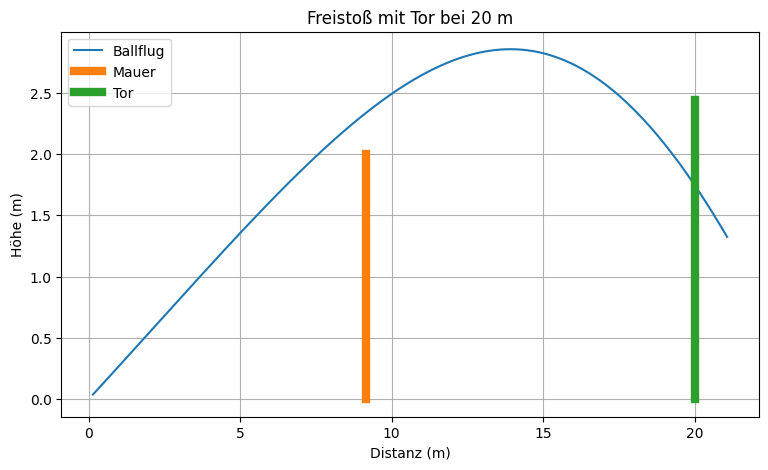

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Konstanten
# -----------------------------
g = 9.81    # Erdbeschleunigung in m/s^2
rho = 1.2   # Dichte der Luft in kg/m^3
Cd = 0.47   # Luftwiderstandsbeiwert für einen runden Ball
Cl = 0.2    # Magnus-Koeffizient (nicht perfekt glatt)
r = 0.11    # Radius des Balls in m
A = np.pi * r**2    # Querschnittsfläche des Balls
m = 0.43    # Masse des Balls in kg

# -----------------------------
# Spielfeld
# -----------------------------
mauer_x = 9.15
mauer_h = 2.0

tor_x = 20.0
tor_h = 2.44

# ----------------------------------------------------------------------
# Freistoß werte variabel zum eintellen
# ---------------------------------------------------------------------
v0 = 15
winkel = 15
spin = 65   # Backspin
dt = 0.01

winkel_rad = np.radians(winkel)

v = np.array([v0*np.cos(winkel_rad), v0*np.sin(winkel_rad)])
pos = np.array([0.0, 0.0])

positionen = []
ueber_mauer = False
im_tor = False

# -----------------------------
# Simulation
# -----------------------------
while pos[1] >= 0 and pos[0] <= tor_x + 1:
    gesamtgeschwindigkeit = np.linalg.norm(v)
    
    F_drag = -0.5 * rho * Cd * A * gesamtgeschwindigkeit * v    # Luftwiderstand
    
    F_magnus = 0.5 * rho * Cl * A * np.array([  # Magnus-Kraft, basierend auf der Rotation des Balls
        -spin * v[1],
         spin * v[0]
    ])
    
    F_gravity = np.array([0, -m*g])             # Schwerkraft
    a = (F_drag + F_magnus + F_gravity) / m     # Gesamtkraft pro Masse = Beschleunigung
    
    v += a * dt         # Geschwindigkeit aktualisieren
    pos += v * dt       # Position aktualisieren
    positionen.append(pos.copy())   # Positionen für Plot speichern
    
    # Prüfen: über Mauer?
    if abs(pos[0] - mauer_x) < 0.05 and pos[1] > mauer_h:
        ueber_mauer = True
    
    # Prüfen: im Tor?
    if abs(pos[0] - tor_x) < 0.05 and 0 < pos[1] < tor_h:
        im_tor = True

positionen = np.array(positionen)

# -----------------------------
# Ausgabe
# -----------------------------
if ueber_mauer:
    print("Ball kommt über die Mauer.")
else:
    print("Ball bleibt in der Mauer hängen.")

if im_tor and ueber_mauer:
    print("TOR!!!")
else:
    print("Kein Tor.")

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(9,5))
plt.plot(positionen[:,0], positionen[:,1], label="Ballflug")

# Mauer
plt.plot([mauer_x, mauer_x], [0, mauer_h], linewidth=6, label="Mauer")

# Tor
plt.plot([tor_x, tor_x], [0, tor_h], linewidth=6, label="Tor")

plt.xlabel("Distanz (m)")
plt.ylabel("Höhe (m)")
plt.title("Freistoß mit Tor bei 20 m")
plt.legend()
plt.grid()
plt.show()